# Homework solution TensorFlow: Fashion MNIST

https://www.kaggle.com/zalando-research/fashionmnist

## Loading the dataset

In [ ]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Class 1')

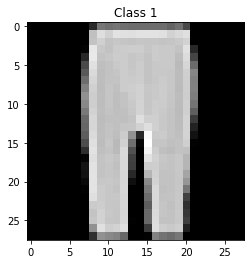

In [ ]:
i = np.random.randint(0, len(X_train))
plt.imshow(X_train[i], cmap = 'gray')
plt.title('Class ' + str(y_train[i]))

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

In [ ]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test = X_test.reshape(10000, 28 * 28)
X_test.shape

(10000, 784)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
X_train.max()

1.0

In [ ]:
X_train.min()

0.0

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Neural network (training)

In [ ]:
(784 + 10) / 2

397.0

In [ ]:
network = Sequential()
network.add(Dense(input_shape = (784,), units = 397, activation = 'relu'))
network.add(Dense(units = 397, activation = 'relu'))
network.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
network.compile(loss = 'sparse_categorical_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

In [ ]:
history = network.fit(X_train, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4860 - accuracy: 0.8261
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3590 - accuracy: 0.8681
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3174 - accuracy: 0.8842
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2944 - accuracy: 0.8906
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2757 - accuracy: 0.8985
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2587 - accuracy: 0.9037
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2454 - accuracy: 0.9083
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2369 - accuracy: 0.9110
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2261 - accuracy: 0.9141
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2145 - accuracy: 0.9191

## Neural network (evaluation)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

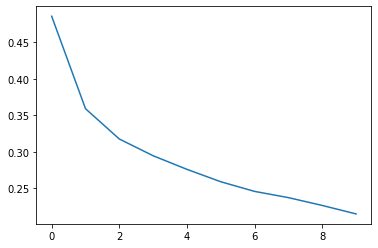

In [ ]:
plt.plot(history.history['loss'])

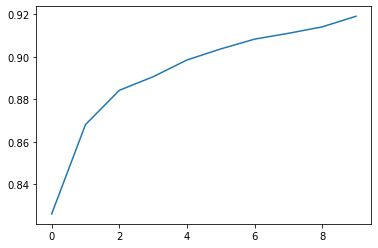

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
accuracy_test = network.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.8875


In [ ]:
predictions = network.predict(X_test)

In [ ]:
predictions[0]

array([5.3578668e-07, 2.7663333e-07, 9.0759741e-08, 1.5636148e-07,
       3.8554185e-07, 4.8894464e-04, 1.9529443e-07, 5.1340158e-03,
       9.4490424e-09, 9.9437547e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

Text(0.5, 1.0, 'Class 9')

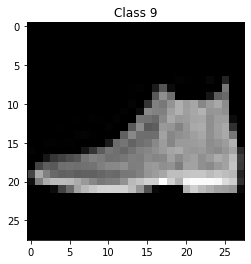

In [ ]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.title('Class ' + str(y_test[0]))